# Amazon top 50 bestselling books - Data analysis

**Intro.**

"Amazon.com, Inc, is an American multinational technology company based in Seattle, Washington, which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is considered one of the Big Five companies in the U.S. information technology industry, along with Google, Apple, Microsoft, and Facebook.The company has been referred to as "one of the most influential economic and cultural forces in the world", as well as the world's most valuable brand."
[https://en.wikipedia.org/wiki/Amazon_(company)](http://)

**About the dataset.**

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

**Purpose of the notebook.**

The purpose of this notebook is to perform a data analysis on the dataset and extract insights that could help the business model grow, such as the best selling genres, authors and a good price/rating relationship.
Such insights have a great business value since knowing what is selling a what is not, the company can focus their marketing strategies to improve overral sells: customer might perceive a genre too expensive so they give a low rating or books with high ratings and low sells might not be visible to other customers.

**Features of the dataset**

- **Name**: Name of the Book. String
- **Author**: The author of the Book. String
- **User Rating**: Amazon User Rating. Float
- **Reviews**: Number of written reviews on amazon. Float
- **Price**: The price of the book (As at 13/10/2020). Float
- **Year**: The Year(s) it ranked on the bestseller. Date
- **Genre**: Whether fiction or non-fiction. String


In [1]:
# data wrangling
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# 1. Data loading and data cleaning
## Data Loading
Let's begging by loading the data set and taking a quick glance at the data set and general statistics, as well as any missing values.

In [2]:
amazon = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


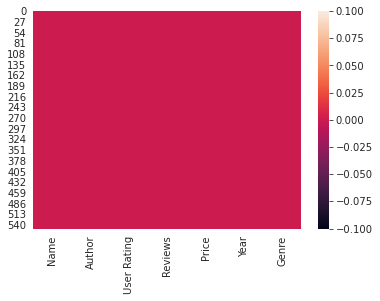

(550, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None 

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.25000

In [3]:
display(amazon.head())

sns.heatmap(amazon.isnull())
plt.show()

print(amazon.shape, "\n")
print(amazon.info(), "\n")
print(amazon.describe())

plt.show()

Thankfully, there aren't any missing values in the dataset.
by looking at the descriptive statistics we can get a first idea of how some features behave: 'Reviews's mean is much bigger than the median, meaning some books have we more reviews than others. on the other hand, 'Price' median is way lower than its mean, meaning that most of the books have a low price.

## Data cleaning
we will go feature by feature to look for inconsistencies and clean them

In [4]:
amazon.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

### Strings

In [5]:
#Name
#The value_counts() function is used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element.
print("Name:", '\n', amazon['Name'].value_counts())


Name: 
 Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
                                                                                ..
The Big Short: Inside the Doomsday Machine                                       1
Happy, Happy, Happy: My Life and Legacy as the Duck Commander                    1
The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)     1
Delivering Happiness: A Path to Profits, Passion, and Purpose                    1
12 Rules for Life: An Antidote to Chaos                                          1
Name: Name, Length: 351, dtype: int64


The books have repeating values. Perhaps, different versions were released in different years. Let's check

In [6]:
display(amazon[amazon['Name']=='Publication Manual of the American Psychological Association, 6th Edition'].head())
display(amazon[amazon['Name']=='StrengthsFinder 2.0'].head())
display(amazon[amazon['Name']=="Oh, the Places You'll Go!"].head())

# Dropping duplicates values
print("shape of the dataset before dropping duplicates is : {}".format(amazon.shape))
amazon.drop_duplicates(inplace=True)
print("shape of the dataset after dropping duplicates is : {}".format(amazon.shape))


,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction


shape of the dataset before dropping duplicates is : (550, 7)
shape of the dataset after dropping duplicates is : (550, 7)


The names that appear more than one time in the dataset are indeed duplicated since they were released in several years. The "drop_duplicates" function doesn't drop any value. There are indeed no duplicates in the dataset.

Genre: 
 Non Fiction    310
Fiction        240
Name: Genre, dtype: int64


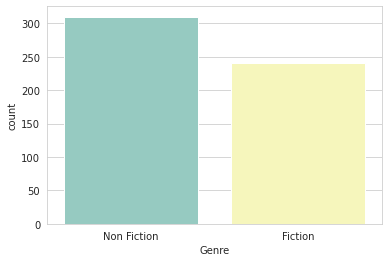

In [7]:
# Genre
print("Genre:", '\n', amazon['Genre'].value_counts())

sns.countplot('Genre', data=amazon, palette='Set3')
plt.show()

The 'Genre' feature shows balanced data and no inconsistencies.

### Numbers

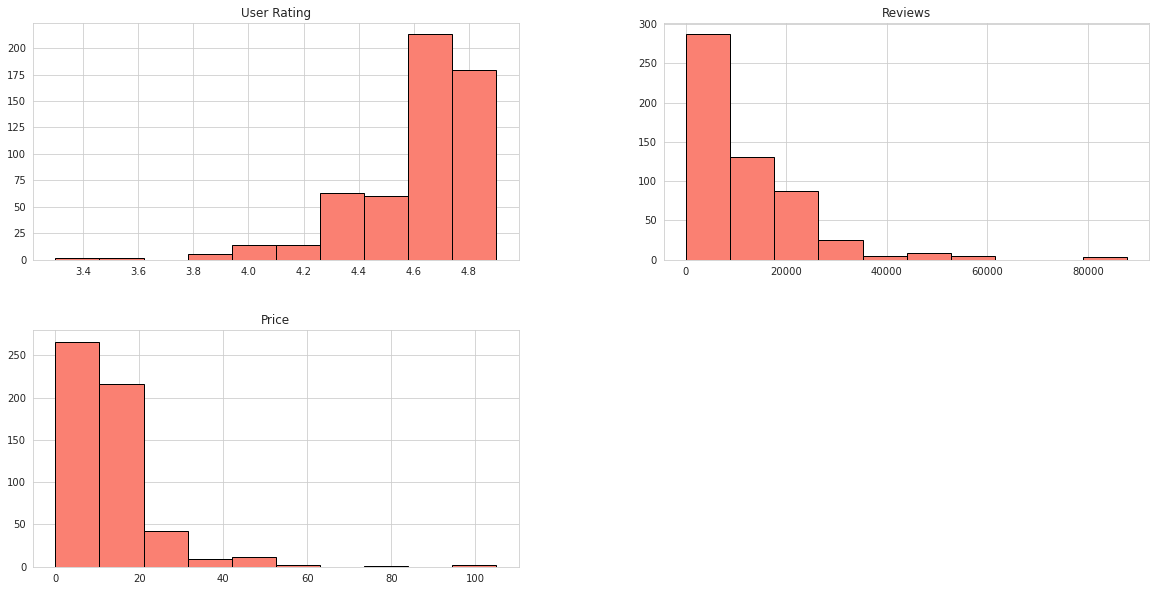

,User Rating,User Rating Count,Reviews,Reviews Count,Price,Price Count
0,"(3.298, 3.46]",1,"(-50.804, 8817.4]",287,"(-0.105, 10.5]",266
1,"(3.46, 3.62]",1,"(8817.4, 17597.8]",131,"(10.5, 21.0]",225
2,"(3.62, 3.78]",0,"(17597.8, 26378.2]",87,"(21.0, 31.5]",33
3,"(3.78, 3.94]",5,"(26378.2, 35158.6]",25,"(31.5, 42.0]",10
4,"(3.94, 4.1]",20,"(35158.6, 43939.0]",4,"(42.0, 52.5]",11
5,"(4.1, 4.26]",8,"(43939.0, 52719.4]",8,"(52.5, 63.0]",2
6,"(4.26, 4.42]",63,"(52719.4, 61499.8]",5,"(63.0, 73.5]",0
7,"(4.42, 4.58]",60,"(61499.8, 70280.2]",0,"(73.5, 84.0]",1
8,"(4.58, 4.74]",213,"(70280.2, 79060.6]",0,"(84.0, 94.5]",0
9,"(4.74, 4.9]",179,"(79060.6, 87841.0]",3,"(94.5, 105.0]",2


In [8]:
numbers = ['User Rating', 'Reviews', 'Price']

amazon.loc[:,numbers].hist(color='salmon', figsize=(20,10), edgecolor='black', bins=10)
#A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".
#amazon.loc[:,numbers]-> entire numbers column
plt.show()


#Pandas cut() function is used to segregate array elements into separate bins. The cut() function works only on one-dimensional array-like objects.
rating_binned = pd.cut(amazon['User Rating'], bins=10)
rating_binned = pd.DataFrame(pd.DataFrame(rating_binned).groupby('User Rating').size(), columns=['User Rating Count']).reset_index()

Reviews_binned = pd.cut(amazon['Reviews'], bins=10)
Reviews_binned = pd.DataFrame(pd.DataFrame(Reviews_binned).groupby('Reviews').size(), columns=['Reviews Count']).reset_index()

Price_binned = pd.cut(amazon['Price'], bins=10)
Price_binned = pd.DataFrame(pd.DataFrame(Price_binned).groupby('Price').size(), columns=['Price Count']).reset_index()

display(pd.concat([rating_binned, Reviews_binned, Price_binned], axis=1))


Even though the data presents some outliers, they are not going to be dropped (yet) until we see which books belong to these outliers in the tivia section.

### dates

Year: 
 2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64


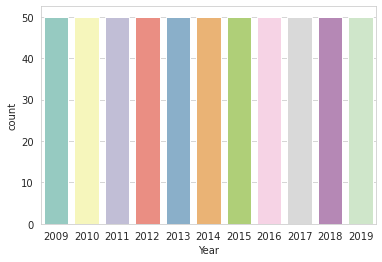

In [9]:
# Year
print("Year:", '\n', amazon['Year'].value_counts())

sns.countplot('Year', data=amazon, palette='Set3')
plt.show()

the data again doesn't show any inconsistencies and has a highly balanced shape 

# 2. Data Analysis

## 2.1 'Genre' performance as per 'User Rating'

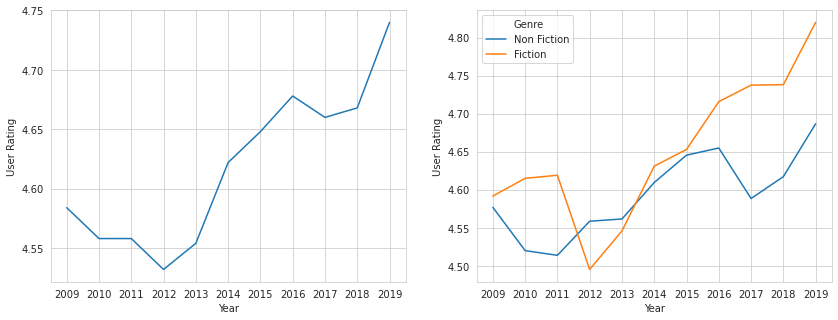

,User Rating,Rating Fiction,Rating Non Fiction
Year,,,
2009,4.584,4.592,4.577
2010,4.558,4.615,4.520
2011,4.558,4.619,4.514
2012,4.532,4.495,4.559
2013,4.554,4.546,4.562
2014,4.622,4.631,4.610
2015,4.648,4.653,4.645
2016,4.678,4.716,4.655
2017,4.660,4.737,4.588


In [10]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rating = amazon.groupby('Year')['User Rating'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='User Rating', data=amazon, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=amazon['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='User Rating', hue='Genre', data=amazon, ci=None, markers=True, ax=ax[1])
ax[1].set_xticks(ticks=amazon['Year'].value_counts(ascending=True).index)

plt.show()

time = pd.DataFrame(amazon.groupby('Year')['User Rating'].mean())
time_genre = pd.DataFrame(amazon.groupby(['Genre', 'Year'])['User Rating'].mean())

time['Rating Fiction'] = list(np.around(time_genre.loc['Fiction'].reset_index()['User Rating'], 3))
time['Rating Non Fiction'] = list(np.around(time_genre.loc['Non Fiction'].reset_index()['User Rating'], 3))
display(time)

* Since 2012, the books have been performing well in terms of average 'User Rating', showing an increasing trend. In 2016, though, the trend had a small decrease of 0.018. Taking a look at the performance per genre, we can see that the small decrease was because of a sloppy performance of Non fiction books that year, decrease from 4.655 to 4.588. However, Non fiction books were able to recover themeselves and revert the decreasing trend just in 2017
* Except from 2012 and 2013, Fiction books have been performing better that Non Fiction books

## 2.2 Prices behaviour

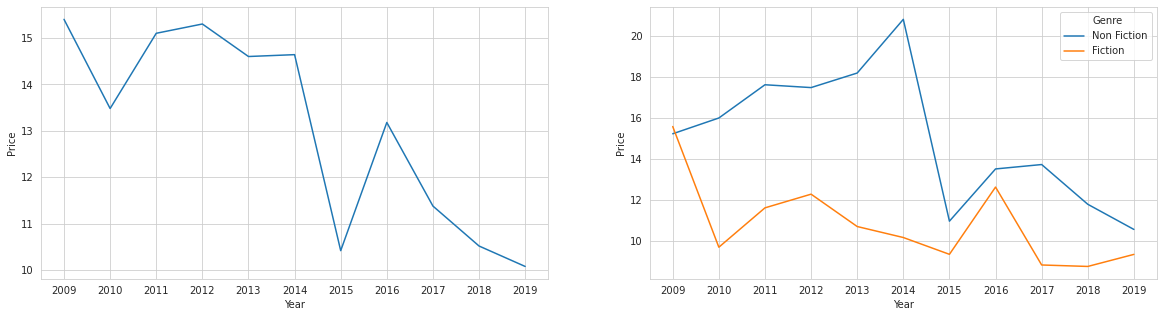

,Price,Price Fiction,Price Non Fiction
Year,,,
2009,15.40,15.583,15.231
2010,13.48,9.700,16.000
2011,15.10,11.619,17.621
2012,15.30,12.286,17.483
2013,14.60,10.708,18.192
2014,14.64,10.172,20.810
2015,10.42,9.353,10.970
2016,13.18,12.632,13.516
2017,11.38,8.833,13.731


In [11]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

price = amazon.groupby('Year')['Price'].mean()
price = price.reset_index()

sns.lineplot(x='Year', y='Price', data=amazon, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=amazon['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='Price', data=amazon, ci=None, markers=True, ax=ax[1], hue='Genre')
ax[1].set_xticks(ticks=amazon['Year'].value_counts(ascending=True).index)

plt.show()

time = pd.DataFrame(amazon.groupby('Year')['Price'].mean())
time_genre = pd.DataFrame(amazon.groupby(['Genre', 'Year'])['Price'].mean())

time['Price Fiction'] = list(np.around(time_genre.loc['Fiction'].reset_index()['Price'], 3))
time['Price Non Fiction'] = list(np.around(time_genre.loc['Non Fiction'].reset_index()['Price'], 3))
display(time)

* Overall, prices show a decreasing trend, having a drastic decrease in 2014, due to the Non Fiction genre, which has been showing high prices in comparisson to Fiction books prices untils 2014. Perhaps an attempt to catch up with the Fiction genre in terms of User Rating?
* There was an increase in prices in 2015 from both genres. Nevertheless, the trend decreased again in 2016.

## 2.3 Prices and User Rating

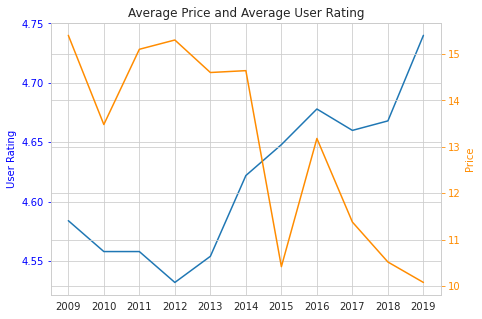

In [12]:
fig, ax = plt.subplots(figsize=(7,5))

ax.set_title('Average Price and Average User Rating')

ax.plot(amazon.groupby('Year')['User Rating'].mean())
ax.tick_params('y', colors='blue')
ax.set_ylabel('User Rating', color='blue')

#ax = twinx() create a twin of Axes for generating a plot with a sharex x-axis but independent y axis. The y-axis of self will have ticks on left and the returned axes will have ticks on the right.
ax2 = ax.twinx()
ax2.plot(amazon.groupby('Year')['Price'].mean(), color='darkorange')
ax2.tick_params('y', colors='darkorange')
ax2.set_ylabel('Price', color='darkorange')

ax.set_xticks(ticks=amazon['Year'].value_counts(ascending=True).index)

plt.show()



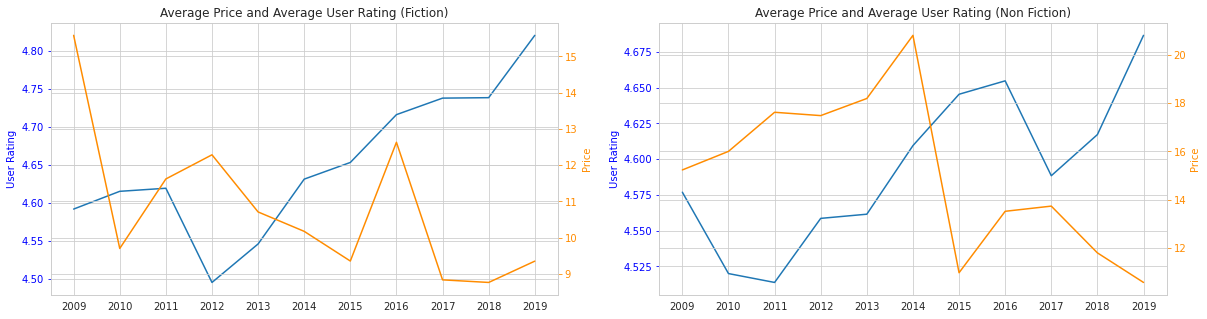

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

fiction = amazon[amazon['Genre']=='Fiction']

Nonfiction = amazon[amazon['Genre']=='Non Fiction']


ax[0].set_title('Average Price and Average User Rating (Fiction)')

ax[0].plot(fiction.groupby('Year')['User Rating'].mean())
ax[0].tick_params('y', colors='blue')
ax[0].set_ylabel('User Rating', color='blue')

ax2 = ax[0].twinx()
ax2.plot(fiction.groupby('Year')['Price'].mean(), color='darkorange')
ax2.tick_params('y', colors='darkorange')
ax2.set_ylabel('Price', color='darkorange')

ax[0].set_xticks(ticks=amazon['Year'].value_counts(ascending=True).index)


ax[1].set_title('Average Price and Average User Rating (Non Fiction)')

ax[1].plot(Nonfiction.groupby('Year')['User Rating'].mean())
ax[1].tick_params('y', colors='blue')
ax[1].set_ylabel('User Rating', color='blue')

ax3 = ax[1].twinx()
ax3.plot(Nonfiction.groupby('Year')['Price'].mean(), color='darkorange')
ax3.tick_params('y', colors='darkorange')
ax3.set_ylabel('Price', color='darkorange')

ax[1].set_xticks(ticks=amazon['Year'].value_counts(ascending=True).index)


plt.show()

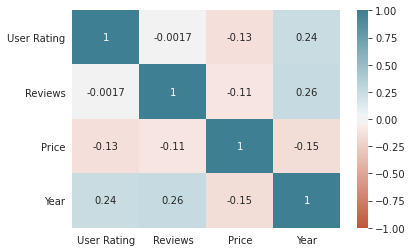

In [14]:
sns.heatmap(amazon.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)
plt.show()

* From the above graphics, we can see a not so clear tendency of 'User Rating' moving in the opposite direction of 'Price'

* The correlation is not so strong between 'Price' and 'User Rating'. Therefore, is not a good idea to jump into a ultimate conclusion out of this graphics. Nevertheless, The tendency still show 'Price' going down and 'User Rating' going up in the final years. 

## 2.4 Which books give the best rating for money?

In [15]:
amazon['Price/Rating'] = amazon['Price'] / amazon['User Rating']
amazon.sort_values('Price/Rating').head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Price/Rating
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction,0.0
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction,0.0
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction,0.0
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction,0.0
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction,0.0
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction,0.0
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction,0.0
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction,0.0
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction,0.0
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction,0.0


The free books don't help in the analysis. let's take those free books out and analyze them seperately in the next section. This section will focus in paid books

In [16]:
amazon[amazon['Price']!=0].sort_values('Price/Rating').head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Price/Rating
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction,0.222222
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction,0.416667
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction,0.434783
389,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2010,Fiction,0.454545
103,Fear: Trump in the White House,Bob Woodward,4.4,6042,2,2018,Non Fiction,0.454545
388,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2009,Fiction,0.454545
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,0.638298
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction,0.816327
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction,0.816327
124,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2016,Fiction,0.833333


* With a price of just 1 and a rating of 4.5, "Eat This Not That! Supermarket Survival Guide", by David Zinczenko, gives the best rating for money 

## 2.5 Which are the free books with the best rating?

In [17]:
amazon[amazon['Price']==0].sort_values('User Rating', ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Price/Rating
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction,0.0
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction,0.0
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction,0.0
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction,0.0
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction,0.0
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction,0.0
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction,0.0
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction,0.0
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction,0.0
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction,0.0


* "Little Blue Truck" by Alice Schertle is the most beloved free book with a user rating of 4.9

## 2.6 Number of reviews and rating relationship
Sometimes the rating can be missleading since a very small group of people rank it the best book or a very hyped book gets lots of good reviews. The reviews and rating relationship can give a clearer and more honest picture of the book's performance.

In [18]:
amazon['Reviews/Rating'] = amazon['Reviews']/amazon['User Rating']
amazon.sort_values('Reviews/Rating', ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Price/Rating,Reviews/Rating
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,4.390244,19377.073171
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction,1.707317,19377.073171
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,3.125000,18300.208333
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction,2.500000,14317.750000
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction,2.500000,14317.750000
...,...,...,...,...,...,...,...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction,2.500000,100.000000
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction,3.333333,97.333333
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction,4.444444,90.666667
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction,3.695652,47.826087


* We can trust the top three books ratings since they have lots of reviews. In relation to the others bestselling books, two of the top three books in this list ('The Girl on the Rain' and 'Gone Girl') do not perform so well with a rating of 4.1 and 4.0. On the other hand, "Where the Crawdads Sing" by Delia Owens, looks like a very smart choice since it got lots of reviews and a top rating

* On the bottom we se Zhi Gang Sha books. Regardless of the good rating of this books, the number of reviews are not as big as the other books and therefore it gives an incomplete picture of the book.

## Bonus. What's the most expensive book?

In [19]:
print('Would you buy the {}?'.format(amazon.sort_values('Price', ascending=False).iloc[0,0]))

Would you buy the Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5?
